This is the joint notbook

REQUIREMENT

Presentation:\
A. General overview of CRISP DM process to build a statistical model.\
B. Data understanding / descriptive analyses
>    1. histogram of volatilites of features
>    2. histogram of percentage of missing values of features
>    3. frequency distribution of target values
>    4. correlation heatmap

READ FILES

In [2]:
#this function is to read, transform and join 2 data frame
#%%

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

def read_secom():
    path = 'secom.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['feature'+str(x+1) for x in range(len(df.columns))]
    return df


#%%
def read_labels():
    path = 'secom_labels.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['status','timestamp']
    df['timestamp'] = pd.to_datetime(df['timestamp'],dayfirst=True)
    return df

#read 2 df 
df_features = read_secom()
df_target = read_labels()

#concat them vertically
df = pd.concat([df_features,df_target],axis=1)

df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,status,timestamp
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,2008-07-19 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,2008-07-19 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,2008-07-19 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 15:22:00


# 1 histogram of volatilites of features

In [3]:
scaler = MinMaxScaler()
#It seems like the Scaler works only with series. When we scale the whole dataframe, the datafram will be broken down.
#Then we need to form the dataframe again.

df_features_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)
df_features_scaled

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,0.469231,0.589292,0.499096,0.379841,0.000609,0.0,0.328562,0.965785,0.665019,0.542479,...,NaN,NaN,0.709375,0.012325,0.017510,0.011880,NaN,NaN,NaN,NaN
1,0.575003,0.445535,0.666763,0.393982,0.000133,0.0,0.428942,0.969673,0.656639,0.412315,...,0.181159,0.282386,0.753125,0.034637,0.036965,0.033099,0.221387,0.220339,0.181159,0.282386
2,0.308868,0.583388,0.493903,0.457065,0.000744,0.0,0.283455,0.965008,0.542759,0.448168,...,0.500000,0.112383,0.562500,0.020612,0.021401,0.020152,0.629073,0.589309,0.500000,0.112383
3,0.400385,0.466998,0.543479,0.244894,0.000574,0.0,0.469123,0.946345,0.638590,0.319564,...,0.123188,0.100153,0.662500,0.009137,0.007782,0.008734,0.309942,0.152542,0.123188,0.100153
4,0.471367,0.500400,0.678327,0.357067,0.000765,0.0,0.387631,0.960342,0.670606,0.392050,...,NaN,NaN,0.068750,1.000000,1.000000,1.000000,0.309942,0.152542,0.123188,0.100153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,0.254718,0.444401,0.467675,0.830510,0.000721,0.0,0.002453,0.970451,0.325312,0.381138,...,0.134058,0.275560,0.656250,0.017637,0.021401,0.017016,0.197995,0.138201,0.134058,0.275560
1563,0.504102,0.529017,0.541646,0.302731,0.000175,0.0,0.346719,0.937014,0.520627,0.368667,...,NaN,NaN,0.615625,0.015087,0.018482,0.014538,0.197995,0.138201,0.134058,0.275560
1564,0.384221,0.321409,0.572020,0.298919,0.000128,0.0,0.366738,0.939347,NaN,NaN,...,0.054348,0.059030,0.653125,0.019762,0.023346,0.018974,0.305764,0.070404,0.054348,0.059030
1565,0.247394,0.542774,0.457071,0.318631,0.000800,0.0,0.353699,0.943235,0.582725,0.360094,...,0.235507,0.126805,0.706250,0.025074,0.020428,0.024144,0.360067,0.277705,0.235507,0.126805


In [4]:
df_eda = df_features_scaled.describe().T
df_eda

,count,mean,std,min,25%,50%,75%,max
feature1,1561.0,0.442356,0.120079,0.0,0.363752,0.437523,0.511181,1.0
feature2,1560.0,0.490192,0.116924,0.0,0.426788,0.495361,0.552680,1.0
feature3,1553.0,0.549425,0.115917,0.0,0.472825,0.551465,0.618191,1.0
feature4,1553.0,0.375871,0.118893,0.0,0.291215,0.345949,0.428319,1.0
feature5,1553.0,0.003156,0.050595,0.0,0.000302,0.000570,0.000758,1.0
...,...,...,...,...,...,...,...,...
feature586,1566.0,0.019064,0.036471,0.0,0.011304,0.015903,0.021382,1.0
feature587,1566.0,0.320455,0.103243,0.0,0.253342,0.312448,0.371763,1.0
feature588,1566.0,0.173076,0.114831,0.0,0.096480,0.151239,0.222947,1.0
feature589,1566.0,0.155193,0.103879,0.0,0.083333,0.130435,0.195652,1.0


<AxesSubplot:xlabel='std', ylabel='Count'>

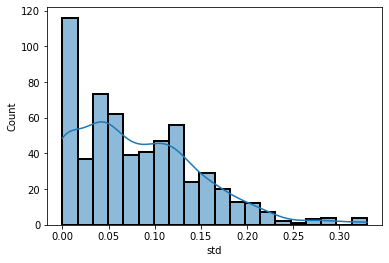

In [5]:
sns.histplot(data=df_eda, x='std',bins=20, linewidth=2, kde=True)

In [6]:
df_features.var()

feature1        5420.167484
feature2        6465.399020
feature3         871.026144
feature4      195091.505178
feature5        3175.946899
                  ...      
feature586        12.802321
feature587         0.000153
feature588         0.000078
feature589         0.000008
feature590      8815.692532
Length: 590, dtype: float64

In [7]:
df_var= pd.cut(df_features.var(),[-0.1,0,0.1,0.2,1,10,50,100,500,1000,float('inf')]).value_counts().sort_index()
df_var

(-0.1, 0.0]        116
(0.0, 0.1]         202
(0.1, 0.2]          10
(0.2, 1.0]          17
(1.0, 10.0]         55
(10.0, 50.0]        50
(50.0, 100.0]       20
(100.0, 500.0]      38
(500.0, 1000.0]     11
(1000.0, inf]       71
dtype: int64

# 2 histogram of percentage of missing values of feature

# 3 frequency distribution of target values

# 4 correlation heatmap

## Heatmap

Text(0.5, 1.0, 'Correlation heatmap for the Features (zoom in)')

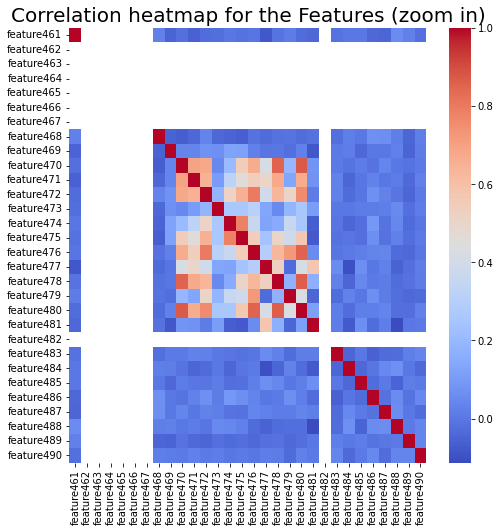

In [8]:
plt.rcParams['figure.figsize'] = (8, 8) #this is to set the size for the plot, making it bigger
sns.heatmap(df_features.iloc[:,np.arange(460,490,1)].corr(), cmap = "coolwarm")
plt.title('Correlation heatmap for the Features (zoom in)', fontsize = 20)

Text(0.5, 1.0, 'Correlation heatmap for the Features (zoom in)')

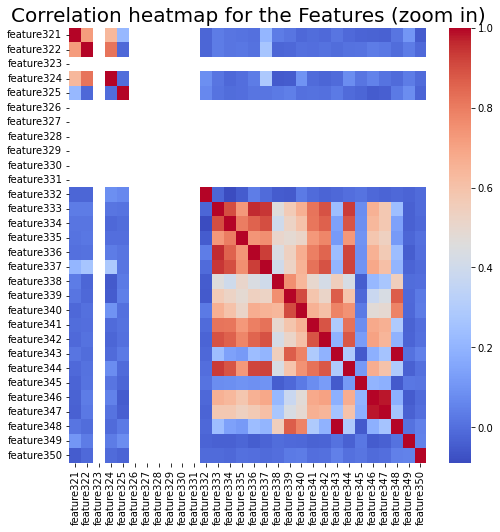

In [9]:
plt.rcParams['figure.figsize'] = (8, 8) #this is to set the size for the plot, making it bigger
sns.heatmap(df_features.iloc[:,np.arange(320,350,1)].corr(), cmap = "coolwarm")
plt.title('Correlation heatmap for the Features (zoom in)', fontsize = 20)

Text(0.5, 1.0, 'Correlation heatmap for the Features')

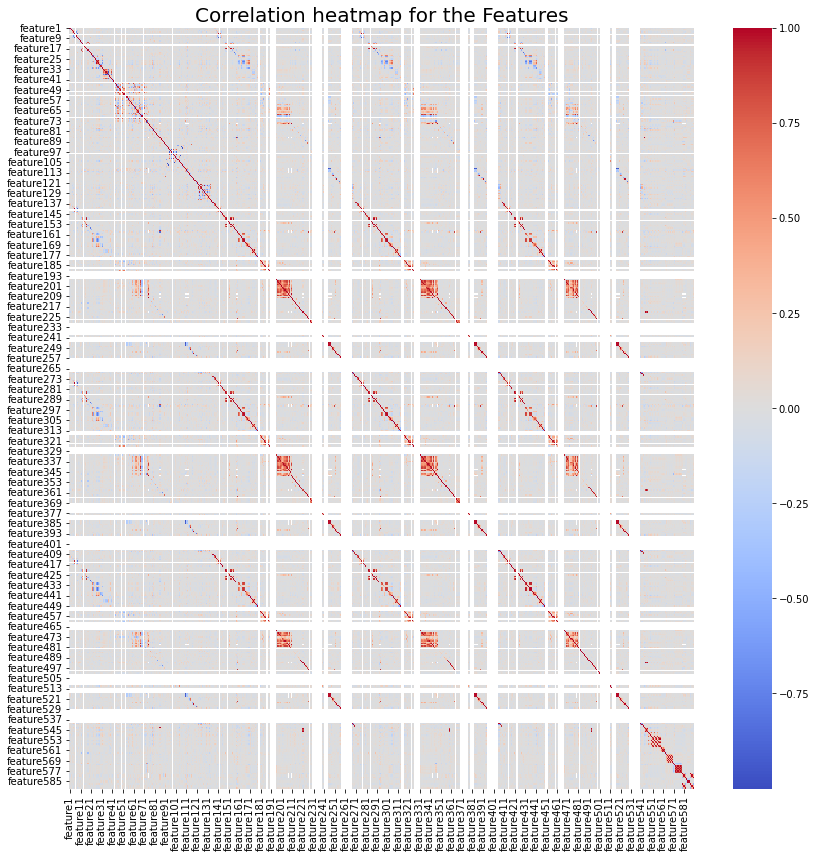

In [10]:
#this plot is just to show corr pattern, we cannot use it for any cleaning purpose
plt.rcParams['figure.figsize'] = (14, 14) #this is to set the size for the plot, making it bigger
sns.heatmap(df_features.corr(), cmap = "coolwarm")
plt.title('Correlation heatmap for the Features', fontsize = 20)

In [11]:
np.arange(1,5,1).tolist()

[1, 2, 3, 4]

In [12]:
df_corr = df_features.corr()
df_corr

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
feature1,1.000000,-0.145071,0.004775,-0.007655,-0.011047,NaN,0.002281,0.031510,-0.052731,0.009052,...,-0.070137,-0.028380,0.000225,0.023469,0.019921,0.023605,0.018472,-0.025909,-0.028196,0.004177
feature2,-0.145071,1.000000,0.005802,-0.007603,-0.001641,NaN,-0.025702,-0.012084,0.031321,0.024015,...,0.073211,0.083463,0.043690,0.002905,-0.001264,0.002273,-0.009417,0.017290,0.010134,0.044834
feature3,0.004775,0.005802,1.000000,0.298935,0.095891,NaN,-0.136225,-0.273970,0.023609,0.016291,...,-0.018721,-0.010759,-0.006061,0.015711,0.018237,0.015765,-0.025548,-0.029479,-0.030943,-0.033226
feature4,-0.007655,-0.007603,0.298935,1.000000,-0.058483,NaN,-0.685835,0.138290,-0.103656,0.068998,...,-0.057051,-0.096619,0.009045,0.025461,0.024754,0.026043,0.034779,-0.039309,-0.033780,-0.081157
feature5,-0.011047,-0.001641,0.095891,-0.058483,1.000000,NaN,-0.074368,-0.916410,-0.026035,0.054619,...,-0.041290,0.088327,0.045361,-0.001301,-0.001598,-0.001617,-0.044016,-0.031145,-0.026204,0.051428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature586,0.023605,0.002273,0.015765,0.026043,-0.001617,NaN,-0.039569,0.010345,0.017930,-0.036132,...,-0.000395,-0.000673,-0.197363,0.999890,0.995342,1.000000,0.002744,-0.002931,-0.002531,-0.003801
feature587,0.018472,-0.009417,-0.025548,0.034779,-0.044016,NaN,-0.041296,0.058171,0.010436,0.033759,...,0.249926,-0.475397,-0.016726,0.002257,0.001606,0.002744,1.000000,0.167913,0.164238,-0.486559
feature588,-0.025909,0.017290,-0.029479,-0.039309,-0.031145,NaN,0.034184,-0.021472,0.022853,0.059341,...,0.975470,0.396369,-0.024481,-0.002650,-0.002498,-0.002931,0.167913,1.000000,0.974276,0.390813
feature589,-0.028196,0.010134,-0.030943,-0.033780,-0.026204,NaN,0.032359,-0.020962,0.026261,0.060803,...,1.000000,0.379167,-0.020712,-0.002261,-0.001957,-0.002531,0.164238,0.974276,1.000000,0.389211


In [13]:
df_features.iloc[:,0]

0       3030.93
1       3095.78
2       2932.61
3       2988.72
4       3032.24
         ...   
1562    2899.41
1563    3052.31
1564    2978.81
1565    2894.92
1566    2944.92
Name: feature1, Length: 1567, dtype: float64

In [14]:
df_features.iloc[:,5]

0       100.0
1       100.0
2       100.0
3       100.0
4       100.0
        ...  
1562    100.0
1563    100.0
1564    100.0
1565    100.0
1566    100.0
Name: feature6, Length: 1567, dtype: float64

## Histogram of correlations

In [16]:
#? if 2 features have high corr, do we remove both of them or just 1. If just 1, then which one do you remove?

dict_corr_pair = {}

#to understand the nested loop below, you should look at the top triangle of corr() matrix, we just need to loo through 1 of the 2 triangle because they are the same
 

for i in range(0, len(df_corr.columns)):
    for j in range(i+1,len(df_corr.columns)):
        dict_corr_pair[str(i+1)+';'+str(j+1)] = df_corr.iloc[i,j]

df_corr_pair = pd.DataFrame.from_dict(dict_corr_pair, orient='index')
df_corr_pair.columns=['correlation']
df_corr_pair

,correlation
1;2,-0.145071
1;3,0.004775
1;4,-0.007655
1;5,-0.011047
1;6,NaN
...,...
587;589,0.164238
587;590,-0.486559
588;589,0.974276
588;590,0.390813


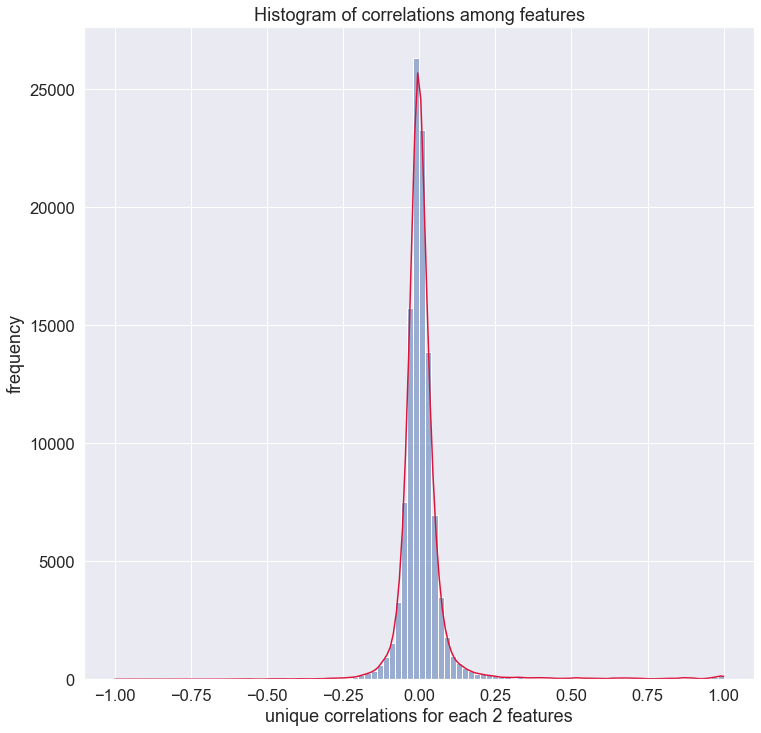

In [108]:
plt.rcParams['figure.figsize'] = (12, 12)
ax = sns.histplot(   data=df_corr_pair, x='correlation',bins=100, linewidth=1, kde=True)
ax.lines[0].set_color('crimson')
ax.lines[0].linewidth=10
ax.set(xlabel="unique correlations for each 2 features", ylabel = "frequency")
ax.set_title("Histogram of correlations among features")
sns.set(font_scale = 1.5)

In [114]:
df_corr_pair['correlation']

1;2       -0.145071
1;3        0.004775
1;4       -0.007655
1;5       -0.011047
1;6             NaN
             ...   
587;589    0.164238
587;590   -0.486559
588;589    0.974276
588;590    0.390813
589;590    0.389211
Name: correlation, Length: 173755, dtype: float64

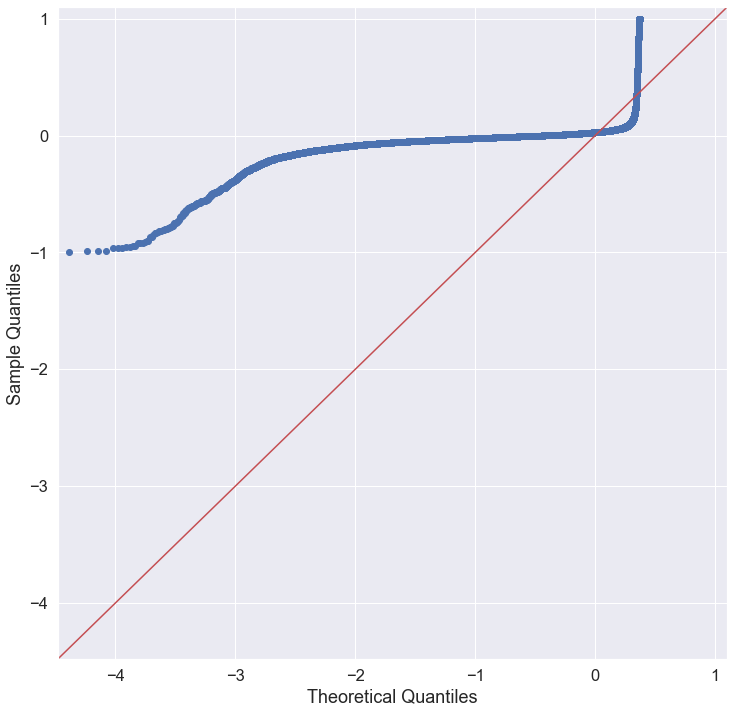

In [127]:
import statsmodels.api as sm

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(df_corr_pair['correlation'], line='45')
plt.show()


In [128]:
from scipy.stats import kstest
stat, p = kstest(df_corr_pair['correlation'].to_numpy(),'norm')
print(p)
print(stat)

nan
nan


In [81]:
#there are many pairs spawn from 590 features
df_corr_pair.shape

(173755, 1)

In [19]:
#create frequency table for the corr pairs
df_corr_pair.apply(lambda x: pd.cut(x, bins=[0,0.2,0.4,0.6,0.8,1]).value_counts()).add_prefix('count_')
#pd_cut will label the row with [a,b] which belong that row value

,count_correlation
"(0.0, 0.2]",52111
"(0.2, 0.4]",1016
"(0.8, 1.0]",644
"(0.4, 0.6]",469
"(0.6, 0.8]",385


In [20]:
df_corr_pair[df_corr_pair['correlation']==1]

,correlation
86;543,1.0
221;544,1.0
359;545,1.0
493;546,1.0
579;587,1.0
580;588,1.0
581;589,1.0
582;590,1.0


In [21]:
df_stats = df_features.describe()

## Duplicated features

In [22]:
#find the duplicated features (columns)
dict_duplicate_pair = {}
dict_duplicate_matches = {}
list_duplicate = []
to_remove = []
for i in range(0, len(df_features.columns)):
    l = []
    for j in range(i+1,len(df_features.columns)):
        dict_duplicate_pair[str(i+1)+';'+str(j+1)] = df_features.iloc[:,i].equals(df_features.iloc[:,j])
        if df_features.iloc[:,i].equals(df_features.iloc[:,j]) == True:
            if j not in list_duplicate:
                l.append(j)
                to_remove.append('feature'+str(j+1))
            list_duplicate.append(i)
            list_duplicate.append(j)
    if len(l)!=0:
        dict_duplicate_matches[i] = l


df_duplicate_pair = pd.DataFrame.from_dict(dict_duplicate_pair, orient='index')
df_duplicate_pair.columns=['duplicate']

df_duplicate_matches = pd.DataFrame.from_dict(dict_duplicate_matches, orient='index')

In [23]:
len(to_remove)

104

In [24]:
to_remove

['feature150',
 'feature285',
 'feature423',
 'feature180',
 'feature187',
 'feature190',
 'feature316',
 'feature323',
 'feature326',
 'feature452',
 'feature459',
 'feature462',
 'feature227',
 'feature230',
 'feature231',
 'feature232',
 'feature233',
 'feature234',
 'feature235',
 'feature236',
 'feature237',
 'feature238',
 'feature241',
 'feature242',
 'feature243',
 'feature244',
 'feature365',
 'feature370',
 'feature371',
 'feature372',
 'feature373',
 'feature374',
 'feature375',
 'feature376',
 'feature379',
 'feature380',
 'feature381',
 'feature382',
 'feature499',
 'feature502',
 'feature503',
 'feature504',
 'feature505',
 'feature506',
 'feature507',
 'feature508',
 'feature509',
 'feature510',
 'feature513',
 'feature514',
 'feature515',
 'feature516',
 'feature277',
 'feature415',
 'feature314',
 'feature315',
 'feature450',
 'feature451',
 'feature192',
 'feature193',
 'feature194',
 'feature195',
 'feature327',
 'feature328',
 'feature329',
 'feature330',
 'feature3

In [25]:
#df.loc[:, ~df.columns.isin(['rebounds', 'assists'])]
df_features.iloc[:,~df_features.columns.isin(to_remove)]

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [26]:
df_features_removed_dup = df_features.iloc[:,~df_features.columns.isin(to_remove)]

Text(0.5, 1.0, 'Correlation heatmap for the Features after removing duplicated features')

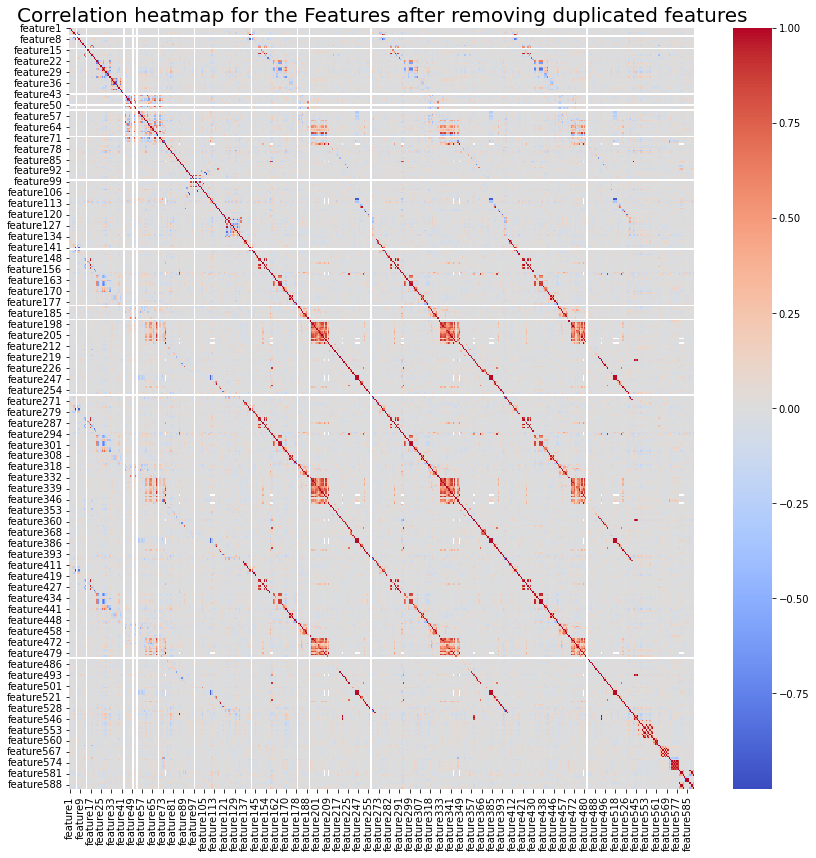

In [27]:
#this plot is just to show corr pattern, we cannot use it for any cleaning purpose
plt.rcParams['figure.figsize'] = (14, 14) #this is to set the size for the plot, making it bigger
sns.heatmap(df_features_removed_dup.corr(), cmap = "coolwarm")
plt.title('Correlation heatmap for the Features after removing duplicated features', fontsize = 20)

In [28]:
#there are 7 unique features among 104 duplicated features
df_duplicate_matches

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
13,149,284,422.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,179,186,189.0,315.0,322.0,325.0,451.0,458.0,461.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,226,229,230.0,231.0,232.0,233.0,234.0,235.0,236.0,237.0,...,504.0,505.0,506.0,507.0,508.0,509.0,512.0,513.0,514.0,515.0
141,276,414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,313,314,449.0,450.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,191,192,193.0,194.0,326.0,327.0,328.0,329.0,330.0,462.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,257,258,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,...,537.0,538.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_features.iloc[:,[52,179,186,189,315]]
df_features.iloc[:,[256,257]]

,feature257,feature258
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
1562,0.0,0.0
1563,0.0,0.0
1564,NaN,NaN
1565,0.0,0.0


In [29]:
df_features.iloc[:,97]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1562    0.0
1563    0.0
1564    0.0
1565    0.0
1566    0.0
Name: feature98, Length: 1567, dtype: float64

In [135]:
df_duplicate_matches = pd.DataFrame.from_dict(dict_duplicate_matches, orient='index')
df_duplicate_matches = df_duplicate_matches.T
df_duplicate_matches

dict_count_unique_dup = {}
for c in df_duplicate_matches.columns:
    dict_count_unique_dup[c] = df_duplicate_matches[df_duplicate_matches[c].notnull()].shape[0]

dict_count_unique_dup
    

{13: 3, 52: 9, 97: 40, 141: 2, 178: 4, 190: 14, 256: 32}

In [154]:
df_count_unique_dup = pd.DataFrame.from_dict(dict_count_unique_dup, orient='index')
df_count_unique_dup.columns=['count_of_duplicates']
df_count_unique_dup.sort_values(by='count_of_duplicates', ascending=True, inplace=True)
df_count_unique_dup

,count_of_duplicates
141,2
13,3
178,4
52,9
190,14
256,32
97,40


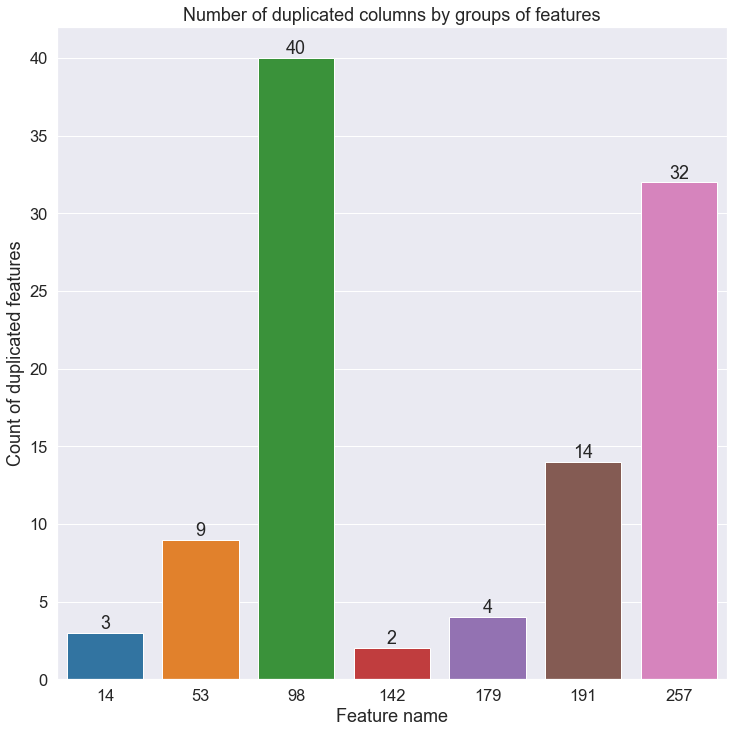

In [167]:
plt.rcParams['figure.figsize'] = (12, 12)

ax = sns.barplot(x=df_count_unique_dup.index+1,y=df_count_unique_dup['count_of_duplicates'], palette = 'tab10')

ax.bar_label(ax.containers[0])
ax.set(xlabel='Feature name', ylabel = 'Count of duplicated features')
ax.set_title('Number of duplicated columns by groups of features')
sns.set(font_scale = 1.5)

In [137]:
df_duplicate_matches

,13,52,97,141,178,190,256
0,149.0,179.0,226.0,276.0,313.0,191.0,257.0
1,284.0,186.0,229.0,414.0,314.0,192.0,258.0
2,422.0,189.0,230.0,NaN,449.0,193.0,259.0
3,NaN,315.0,231.0,NaN,450.0,194.0,260.0
4,NaN,322.0,232.0,NaN,NaN,326.0,261.0
5,NaN,325.0,233.0,NaN,NaN,327.0,262.0
6,NaN,451.0,234.0,NaN,NaN,328.0,263.0
7,NaN,458.0,235.0,NaN,NaN,329.0,264.0
8,NaN,461.0,236.0,NaN,NaN,330.0,265.0
9,NaN,NaN,237.0,NaN,NaN,462.0,266.0


In [169]:
df_features.iloc[:,97].value_counts()

0.0    1561
Name: feature98, dtype: int64

In [168]:
df_features.iloc[:,[97,226,229,230]]

,feature98,feature227,feature230,feature231
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
1562,0.0,0.0,0.0,0.0
1563,0.0,0.0,0.0,0.0
1564,0.0,0.0,0.0,0.0
1565,0.0,0.0,0.0,0.0


In [171]:
df_features.iloc[:,13].value_counts()

0.0    1564
Name: feature14, dtype: int64

In [ ]:
df_features.iloc[:,[13,149,284,422]] 

,feature14,feature150,feature285,feature423
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
1562,0.0,0.0,0.0,0.0
1563,0.0,0.0,0.0,0.0
1564,NaN,NaN,NaN,NaN
1565,0.0,0.0,0.0,0.0


In [31]:
np.unique(list_duplicate)

array([ 13,  52,  97, 141, 149, 178, 179, 186, 189, 190, 191, 192, 193,
       194, 226, 229, 230, 231, 232, 233, 234, 235, 236, 237, 240, 241,
       242, 243, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266,
       276, 284, 313, 314, 315, 322, 325, 326, 327, 328, 329, 330, 364,
       369, 370, 371, 372, 373, 374, 375, 378, 379, 380, 381, 394, 395,
       396, 397, 398, 399, 400, 401, 402, 403, 404, 414, 422, 449, 450,
       451, 458, 461, 462, 463, 464, 465, 466, 498, 501, 502, 503, 504,
       505, 506, 507, 508, 509, 512, 513, 514, 515, 528, 529, 530, 531,
       532, 533, 534, 535, 536, 537, 538])

In [32]:
df_features.iloc[:,np.unique(list_duplicate)]

,feature14,feature53,feature98,feature142,feature150,feature179,feature180,feature187,feature190,feature191,...,feature530,feature531,feature532,feature533,feature534,feature535,feature536,feature537,feature538,feature539
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1564,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
len(list_duplicate)

3034

In [51]:
df_duplicate_pair[df_duplicate_pair['duplicate']==True]

,duplicate
14;150,True
14;285,True
14;423,True
53;180,True
53;187,True
...,...
536;538,True
536;539,True
537;538,True
537;539,True


In [39]:
#checking duplicate columns
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.equals.html

count    False
mean     False
std      False
min      False
25%      False
50%      False
75%      False
max      False
dtype: bool

# APPENDIX

In [ ]:
#EXPLAIN:
#Some of the pairs have corr=NaN, it's due to the std(fx)=0. You can refer to the formular below
#cor(i,j) = cov(i,j)/[stdev(i)*stdev(j)]
df_features.iloc[:,[0,5]].corr()

,feature1,feature6
feature1,1.0,NaN
feature6,NaN,NaN


In [50]:
df_corr_pair.apply(lambda x: pd.cut(x, bins=[0,0.2,0.4,0.6,0.8,1]))

,0
0;1,NaN
0;2,"(0.0, 0.2]"
0;3,NaN
0;4,NaN
0;5,NaN
...,...
586;588,"(0.0, 0.2]"
586;589,NaN
587;588,"(0.8, 1.0]"
587;589,"(0.2, 0.4]"


In [ ]:
#EXPLAIN:
#Some of the pairs have corr=NaN, it's due to the std(fx)=0. You can refer to the formular below
#cor(i,j) = cov(i,j)/[stdev(i)*stdev(j)]
df_features.iloc[:,[0,5]].corr()

,feature1,feature6
feature1,1.0,NaN
feature6,NaN,NaN


In [26]:
# dictionary with list object in values
details = {
    'Name' : ['Ankit', 'Aishwarya', 'Shaurya', 'Shivangi'],
    'Age' : [23, 21, 22, 21],
    'University' : ['BHU', 'JNU', 'DU', 'BHU'],
}
  
# creating a Dataframe object from dictionary 
# with custom indexing
df1 = pd.DataFrame(details, index = ['a', 'b', 'c', 'd'])
df1

,Name,Age,University
a,Ankit,23,BHU
b,Aishwarya,21,JNU
c,Shaurya,22,DU
d,Shivangi,21,BHU


In [27]:
df1.iloc[0]

Name          Ankit
Age              23
University      BHU
Name: a, dtype: object

In [ ]:
unique_vals = df['status'].unique()
unique_vals

array([-1,  1])

In [ ]:
#produce general stats for each feature
df_features.describe()#

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [30]:
#EXPLAIN
#what does the corr=1?
dict1 = {'col_1': [1,2,3,4], 
        'col_2': [1,2,3,4]}
df1 = pd.DataFrame.from_dict(dict1)

print(df1)
print(df1.corr())

####
dict2 = {'col_1': [1,2,3,4], 
        'col_2': [2,3,6,8]}
df2 = pd.DataFrame.from_dict(dict2)
print(df2)
print(df2.corr())

####
dict3 = {'col_1': [1,2,3,4], 
        'col_2': [2,3,4,5]}
df3 = pd.DataFrame.from_dict(dict3)
print(df3)
print(df3.corr())


####
#std(col_2)=0 -> corr = NaN
#cor(i,j) = cov(i,j)/[stdev(i)*stdev(j)]
dict4 = {'col_1': [1,2,3,4], 
        'col_2': [5,5,5,5]}
df4 = pd.DataFrame.from_dict(dict4)
print(df4)
print(df4.corr())


   col_1  col_2
0      1      1
1      2      2
2      3      3
3      4      4
       col_1  col_2
col_1    1.0    1.0
col_2    1.0    1.0
   col_1  col_2
0      1      2
1      2      3
2      3      6
3      4      8
          col_1     col_2
col_1  1.000000  0.984495
col_2  0.984495  1.000000
   col_1  col_2
0      1      2
1      2      3
2      3      4
3      4      5
       col_1  col_2
col_1    1.0    1.0
col_2    1.0    1.0
   col_1  col_2
0      1      5
1      2      5
2      3      5
3      4      5
       col_1  col_2
col_1    1.0    NaN
col_2    NaN    NaN


In [41]:
####
#std(col_2)=0 -> corr = NaN
#cor(i,j) = cov(i,j)/[stdev(i)*stdev(j)]
dict4 = {'col_1': [1,2,3,4], 
        'col_2': [5,5,5,5]}
df4 = pd.DataFrame.from_dict(dict4)
print(df4)
print(df4.corr())

   col_1  col_2
0      1      5
1      2      5
2      3      5
3      4      5
       col_1  col_2
col_1    1.0    NaN
col_2    NaN    NaN


<AxesSubplot:xlabel='correlation', ylabel='Density'>

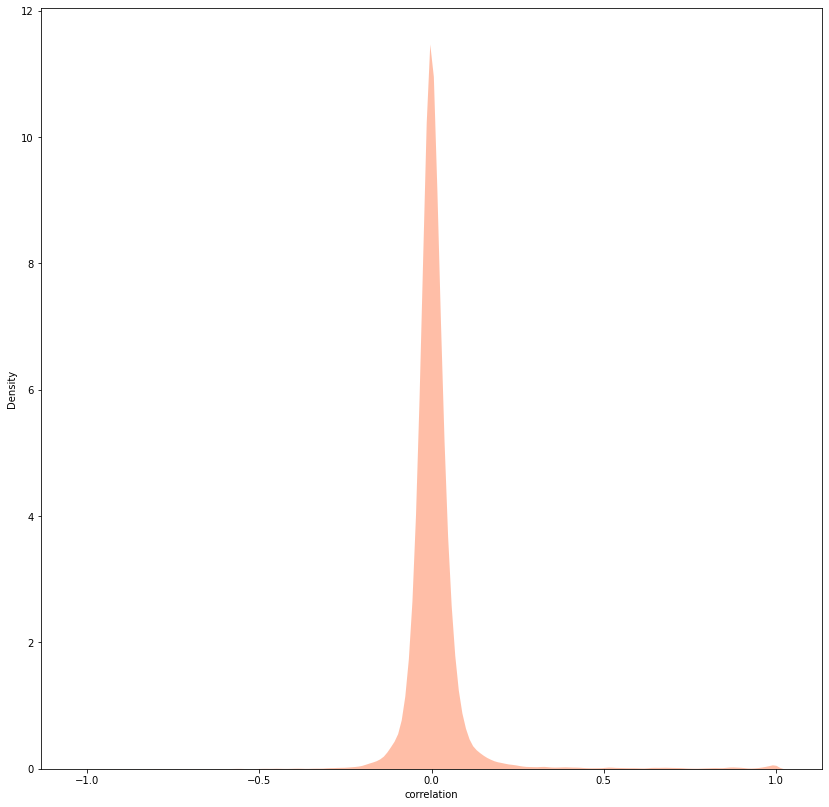

In [57]:
sns.kdeplot(
            data=df_corr_pair, x="correlation",color='coral',
            fill=True, common_norm=False, palette="crest",
            alpha=.5, linewidth=0,
            )
